# Actividad Final

#### Importaciones de librerias

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import os
import glob
import json


Para el poder obtener toda la informacion de los archivos SAV se requiere instalar la siguiente libreria

`pip install pandas pyreadstat`

In [72]:

pyreadEstatInstalado = False

try:
    import pyreadstat
except ImportError:
    print("Error: La biblioteca 'pyreadstat' no está instalada. Instálala usando 'pip install pyreadstat'.")
    pyreadEstatInstalado = False
else:
    pyreadEstatInstalado = True


#### Variables Globales

In [73]:
#Variables globales

nombreCarpeta = "Encuesta INEC 2017-2022- Empleo"
archivosPorDescargar = [
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/stats.csv", "FileName":"stats.csv" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/I%20Trimestre%202017.sav", "FileName":"I Trimestre 2017 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/I%20Trimestre%202018.sav", "FileName":"I Trimestre 2018 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/I%20Trimestre%202019.sav", "FileName":"I Trimestre 2019 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/I%20Trimestre%202020.sav", "FileName":"I Trimestre 2020 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/I%20Trimestre%202021.sav", "FileName":"I Trimestre 2021 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/I%20Trimestre%202022.sav", "FileName":"I Trimestre 2022 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/II%20Trimestre%202017.sav", "FileName":"II Trimestre_2017 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/II%20Trimestre%202018F.sav", "FileName":"II Trimestre_2018F Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/II%20Trimestre%202019.sav", "FileName":"II Trimestre 2019 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/II%20Trimestre%202020.sav", "FileName":"II Trimestre 2020 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/II%20Trimestre%202021.sav", "FileName":"II Trimestre 2021 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/II%20Trimestre%202022.sav", "FileName":"II Trimestre 2022 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/III%20Trimestre%202017.sav", "FileName":"III Trimestre 2017 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/III%20Trimestre%202018.sav", "FileName":"III Trimestre 2018 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/III%20Trimestre%202019.sav", "FileName":"III Trimestre 2019 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/III%20Trimestre%202020.sav", "FileName":"III Trimestre 2020 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/III%20Trimestre%202021.sav", "FileName":"III Trimestre 2021 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/III%20Trimestre%202022.sav", "FileName":"III Trimestre 2022 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/IV%20Trimestre%202017.sav", "FileName":"IV Trimestre 2017 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/IV%20Trimestre%202018.sav", "FileName":"IV Trimestre 2018 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/IV%20Trimestre%202019.sav", "FileName":"IV Trimestre 2019 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/IV%20Trimestre%202020.sav", "FileName":"IV Trimestre 2020 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/IV%20Trimestre%202021.sav", "FileName":"IV Trimestre 2021 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/IV%20Trimestre%202022.sav", "FileName":"IV Trimestre 2022 Downloaded.sav" },
]

## Defincion de funciones

#### Importar CSV's 

In [74]:
def importarDatosDeArchivoCSV(rutaArchivoCSV):
    try:
        rutaCompleta = os.path.join(nombreCarpeta, rutaArchivoCSV)
        print(f"Importando datos desde: {rutaCompleta}")
        datos = pd.read_csv(rutaCompleta)
        return datos
    except FileNotFoundError:
        print(f"Error: El archivo en la ruta '{rutaArchivoCSV}' no se encontró.")
        return None
    except pd.errors.EmptyDataError:
        print("Error: El archivo está vacío.")
        return None
    except pd.errors.ParserError:
        print("Error: Error al parsear el archivo CSV.")
        return None
    except Exception as e:
        print(f"Ocurrió un error inesperado: {e}")
        return None   

def ValidarAnnoDigitado():
    print('Digite un año entre 2017 y 2021:')
    entrada = input()
    numero = int(entrada)
    if(numero not in range(2017,2022)):
        raise TypeError("El valor debe estar entre 2017 y 2021")
    return numero

#### Descarga y borrado de archivos

In [75]:
def DescargarArchivo(url, nombreArchivo):
    respuesta = requests.get(url)
    if not os.path.exists(nombreCarpeta):
        os.makedirs(nombreCarpeta)
        print(f"Carpeta creada: {nombreCarpeta}")
    
    rutaCompleta = os.path.join(nombreCarpeta, nombreArchivo)
    if respuesta.status_code == 200:
        with open(rutaCompleta, 'wb') as f:
            f.write(respuesta.content)
        print(f"Archivo descargado correctamente: {nombreArchivo}")
    else:
        print(f"Error al descargar el archivo: {respuesta.status_code}, {nombreArchivo}")

def borrarArchivos(nombreArchivo):
    rutaCompleta = os.path.join(nombreCarpeta, nombreArchivo)
    try:
        os.remove(rutaCompleta)
        print(f"Archivo {nombreArchivo} borrado correctamente.")
    except FileNotFoundError:
        print(f"El archivo {nombreArchivo} no existe.")
    except Exception as e:
        print(f"Error al borrar el archivo {nombreArchivo}: {e}")

def descargarListaArchivos(archivos):
    for archivo in archivos:
        url = archivo["url"]
        file_name = archivo["FileName"]
        DescargarArchivo(url, file_name)


def borrarListaArchivos(archivos):
    for archivo in archivos:
        nombreArchivo = archivo["FileName"]
        borrarArchivos(nombreArchivo)

#### Realizar la descarga de los archivos

In [76]:
descargarListaArchivos(archivosPorDescargar)

Carpeta creada: Encuesta INEC 2017-2022- Empleo
Archivo descargado correctamente: stats.csv
Archivo descargado correctamente: I Trimestre 2017 Downloaded.sav
Archivo descargado correctamente: I Trimestre 2018 Downloaded.sav
Archivo descargado correctamente: I Trimestre 2019 Downloaded.sav
Archivo descargado correctamente: I Trimestre 2020 Downloaded.sav
Archivo descargado correctamente: I Trimestre 2021 Downloaded.sav
Archivo descargado correctamente: I Trimestre 2022 Downloaded.sav
Archivo descargado correctamente: II Trimestre_2017 Downloaded.sav
Archivo descargado correctamente: II Trimestre_2018F Downloaded.sav
Archivo descargado correctamente: II Trimestre 2019 Downloaded.sav
Archivo descargado correctamente: II Trimestre 2020 Downloaded.sav
Archivo descargado correctamente: II Trimestre 2021 Downloaded.sav
Archivo descargado correctamente: II Trimestre 2022 Downloaded.sav
Archivo descargado correctamente: III Trimestre 2017 Downloaded.sav
Archivo descargado correctamente: III Tri

### Funcion para leer archivos SAV (archivos de datos de SPSS)

Los archivos de datos de IBM® SPSS® Statistics son archivos formateados específicamente para que los utilice IBM SPSS Statistics, que contienen tanto los datos como los metadatos (diccionario) que definen los datos.

Los datos provienenn del [Catalogo Central de Datos de la INEC](http://sistemas.inec.cr/pad5/index.php/catalog/central#_r=1716600981192&collection=&country=&dtype=&from=2001&page=1&ps=&sid=&sk=desempleo&sort_by=rank&sort_order=desc&to=2025&topic=&view=s&vk=)

In [77]:
# Función para recorrer una carpeta y cargar todos los archivos .sav en un solo DataFrame
def cargarTodosLosArchivosSAVEnDataset(rutaArchivosSav):
    if not pyreadEstatInstalado:
        print("No se pueden cargar los archivos .sav porque 'pyreadstat' no está instalado.")
        return None
    
    listaDataframes = []
    for archivoSav in glob.glob(os.path.join(rutaArchivosSav, '*.sav')):
        print(f"Importando datos desde: {archivoSav}")
        df = importarDatosDeArchivoSAV(archivoSav)
        if df is not None and not df.empty:
            df = df.dropna(how='all')
            listaDataframes.append(df)
    
    if listaDataframes:
        datosCombinados = pd.concat(listaDataframes, ignore_index=True)
        return datosCombinados
    else:
        print("No se encontraron archivos .sav o no se pudieron importar los datos.")
        return None
    
# Función para importar datos desde un archivo .sav
def importarDatosDeArchivoSAV(rutaArchivoSAV):
    try:
        datos = pd.read_spss(rutaArchivoSAV)
        #print(datos)
        return datos
    except FileNotFoundError:
        print(f"Error: El archivo en la ruta '{rutaArchivoSAV}' no se encontró.")
        return None
    except Exception as e:
        print(f"Ocurrió un error inesperado al leer archivo {rutaArchivoSAV}. Error: {e} ")
        return None


#### Obtencion de datos de crimenes por provincia en CSV

Los datos provienen del siguiente informe encontrado en el sitio [Crime in Costa Rica from 2017 to 21 oct 2021](https://www.kaggle.com/datasets/lrvdcr/crime-in-costa-rica-from-2017-to-21-oct-2021/suggestions?status=pending&yourSuggestions=true) publicados por Luis Rodolfo Valverde Delgado

In [78]:
datosCrimenes = importarDatosDeArchivoCSV('stats.csv')

# Convertir la columna Date a formato datetime
datosCrimenes['Date'] = pd.to_datetime(datosCrimenes['Date'])
datosCrimenes['Year'] = datosCrimenes['Date'].dt.year
datosCrimenes['Month'] = datosCrimenes['Date'].dt.month
datosCrimenes['Day'] = datosCrimenes['Date'].dt.day
datosCrimenes['ProvCanton'] = datosCrimenes['Province'] + ',' + datosCrimenes['Canton']

Importando datos desde: Encuesta INEC 2017-2022- Empleo\stats.csv


#### Definicion de Datos de Crimenes Por Provincia Canton 

#### Agrupar los datos por Año, Provincia y Cantón, y contar el número de incidentes

In [79]:
grouped_data = datosCrimenes.groupby(['Year', 'Month', 'Province', 'Canton']).size().reset_index(name='Count')
display(grouped_data)

,Year,Month,Province,Canton,Count
0,2017,1,ALAJUELA,ALAJUELA,301
1,2017,1,ALAJUELA,ATENAS,8
2,2017,1,ALAJUELA,GRECIA,53
3,2017,1,ALAJUELA,GUATUSO,7
4,2017,1,ALAJUELA,LOS CHILES,17
...,...,...,...,...,...
4915,2021,10,SAN JOSE,SANTA ANA,26
4916,2021,10,SAN JOSE,TARRAZU,6
4917,2021,10,SAN JOSE,TIBAS,25
4918,2021,10,SAN JOSE,TURRUBARES,3


Digite un año entre 2017 y 2021:


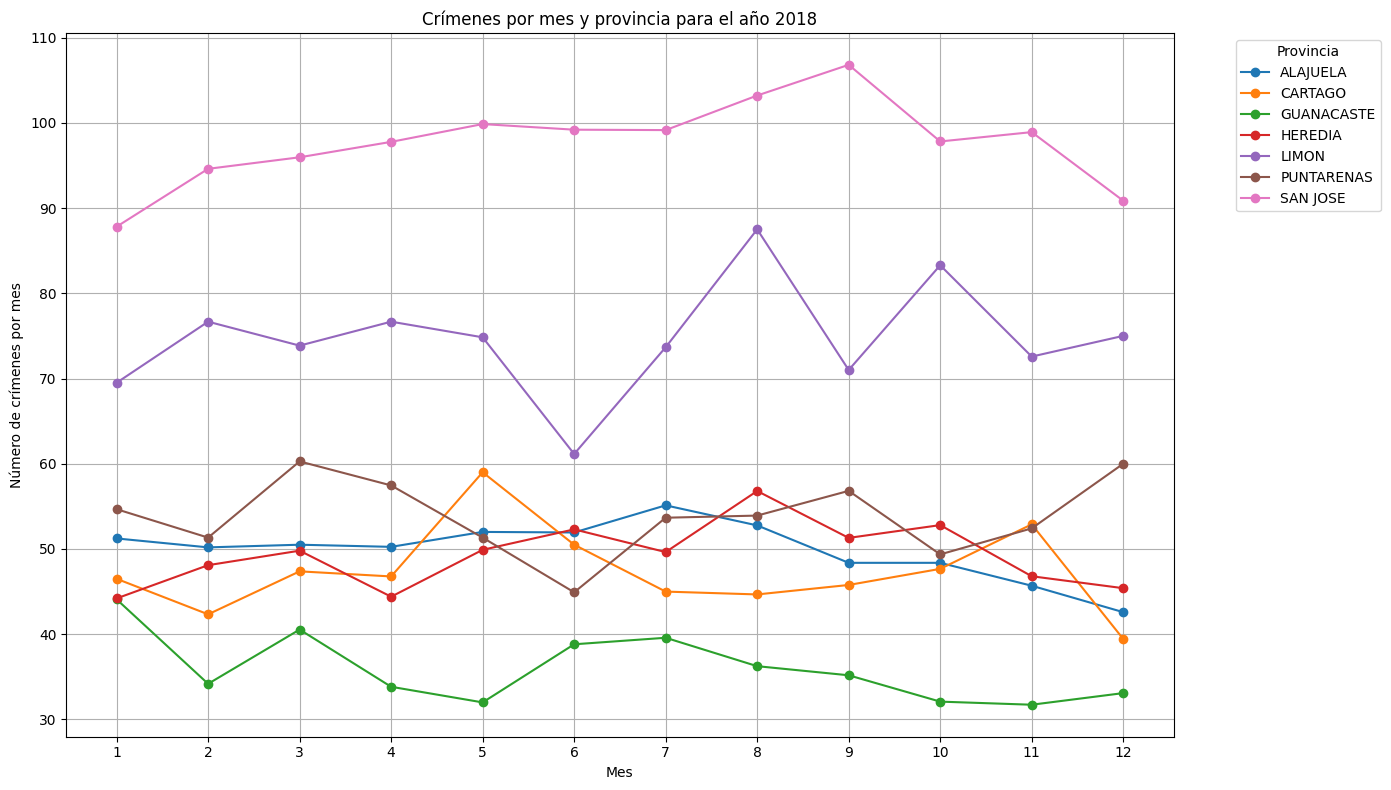

In [80]:
# Agrupar los datos por Año y Provincia, y contar el número de incidentes

try:
    numero = ValidarAnnoDigitado()
    grupoProvinciaPorAnno = datosCrimenes[datosCrimenes['Year'] == numero].groupby(['Year', 'Month', 'Province', 'Canton']).size().reset_index(name='Count')

    # Pivotar los datos para tener una columna por cada provincia
    tablaPivoteMesProvincia = grupoProvinciaPorAnno.pivot_table(index='Month', columns='Province', values='Count', fill_value=0)
    
    # Generar la gráfica de línea
    plt.figure(figsize=(14, 8))
    
    for column in tablaPivoteMesProvincia.columns:
        tablaPivoteMesProvincia[column].plot(kind='line', marker='o', label=column)
    
    plt.title('Crímenes por mes y provincia para el año '+ str(numero))
    plt.xlabel('Mes')
    plt.ylabel('Número de crímenes por mes')
    plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(tablaPivoteMesProvincia.index)
    plt.grid(True)
    plt.tight_layout()
    
    # Mostrar la gráfica
    plt.show()
except ValueError:
    print("La entrada no es un número entero válido")
except TypeError as e:
    print(e)


### Mostrar la evolucion de los crimenes en una provincia 

Lista de provincias
['ALAJUELA' 'SAN JOSE' 'CARTAGO' 'GUANACASTE' 'LIMON' 'HEREDIA'
 'PUNTARENAS' 'DESCONOCIDO']
Digite una provincia:


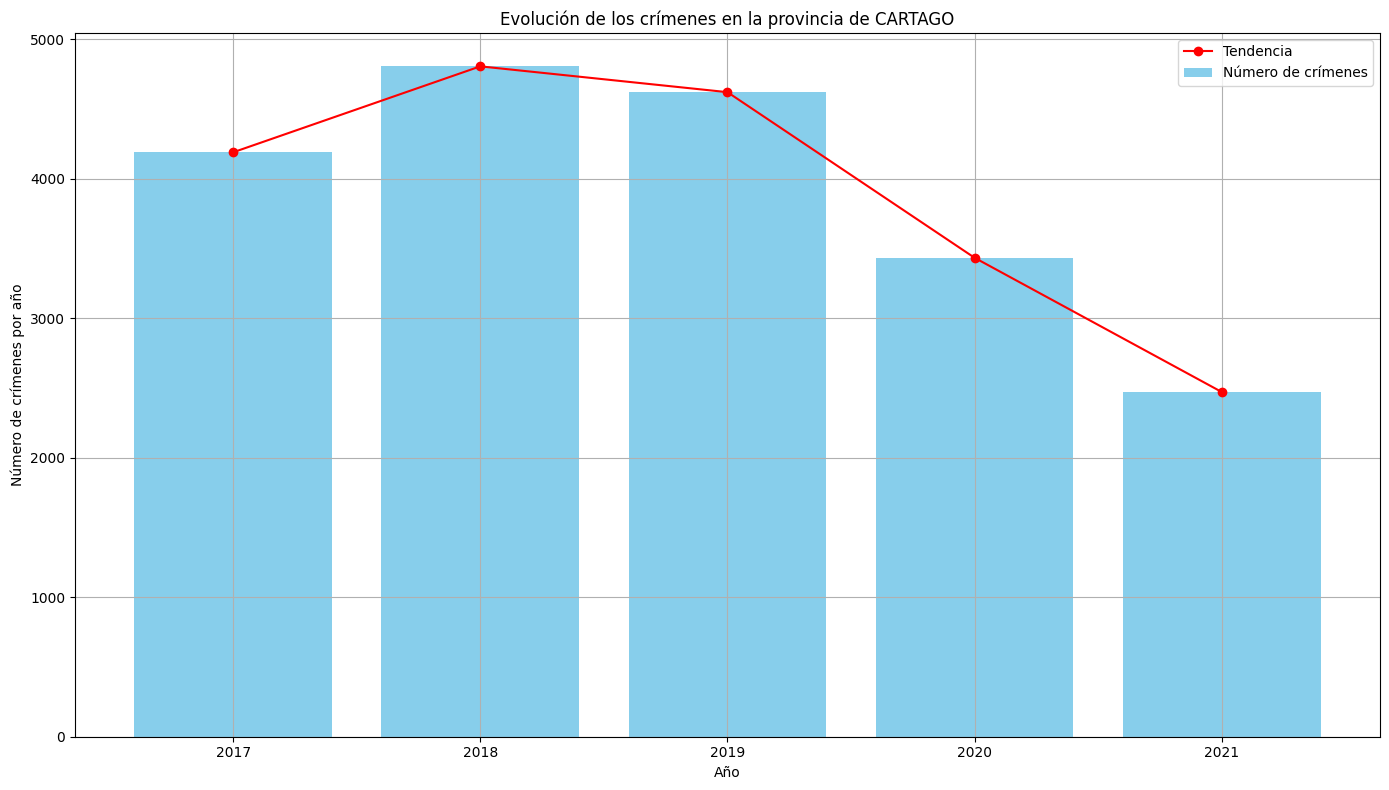

In [81]:
# Mostrar la evolucion de los crimenes en una provincia 
print('Lista de provincias')
provincias = datosCrimenes['Province'].unique()
print(provincias)

print('Digite una provincia:')
entrada = input()

try:
    
    if(entrada not in provincias):
       
        raise TypeError("El valor de estar entre la lista ")
    grupoProvinciaPorAnno2 = datosCrimenes[datosCrimenes['Province'] == entrada].groupby(['Year', 'Province']).size().reset_index(name='Count')
    
    # Generar la gráfica de barras
    plt.figure(figsize=(14, 8))
    plt.bar(grupoProvinciaPorAnno2['Year'], grupoProvinciaPorAnno2['Count'], color='skyblue', label='Número de crímenes')

    # Superponer la línea sobre las barras
    
    plt.plot(grupoProvinciaPorAnno2['Year'], grupoProvinciaPorAnno2['Count'], marker='o', color='red', label='Tendencia')
    plt.title('Evolución de los crímenes en la provincia de ' + entrada)
    plt.xlabel('Año')
    plt.ylabel('Número de crímenes por año')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    # Mostrar la gráfica
    plt.show()
except TypeError as e:
    print(e)

#### Obtener los datos de los archivos SAV de Empleabilidad segun el INEC entre el año 2017 y 2022

In [82]:
from IPython.display import display
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
datosEmpleo = cargarTodosLosArchivosSAVEnDataset(nombreCarpeta)

pd.set_option('display.max_columns', None)

##borrarListaArchivos(archivosPorDescargar)

if datosEmpleo is not None:
    print(f"Datos combinados importados con éxito. Cantidad de datos: {len(datosEmpleo)}"  )
else:
    print("No se pudieron importar y combinar los datos.")

Importando datos desde: Encuesta INEC 2017-2022- Empleo\I Trimestre 2017 Downloaded.sav
Importando datos desde: Encuesta INEC 2017-2022- Empleo\I Trimestre 2018 Downloaded.sav
Importando datos desde: Encuesta INEC 2017-2022- Empleo\I Trimestre 2019 Downloaded.sav
Importando datos desde: Encuesta INEC 2017-2022- Empleo\I Trimestre 2020 Downloaded.sav
Importando datos desde: Encuesta INEC 2017-2022- Empleo\I Trimestre 2021 Downloaded.sav
Importando datos desde: Encuesta INEC 2017-2022- Empleo\I Trimestre 2022 Downloaded.sav
Importando datos desde: Encuesta INEC 2017-2022- Empleo\II Trimestre 2019 Downloaded.sav
Importando datos desde: Encuesta INEC 2017-2022- Empleo\II Trimestre 2020 Downloaded.sav
Importando datos desde: Encuesta INEC 2017-2022- Empleo\II Trimestre 2021 Downloaded.sav
Importando datos desde: Encuesta INEC 2017-2022- Empleo\II Trimestre 2022 Downloaded.sav
Importando datos desde: Encuesta INEC 2017-2022- Empleo\II Trimestre_2017 Downloaded.sav
Importando datos desde: Enc

#### Ver el porcentaje de desempleo en Costa Rica entre 2017 y 2022

Porcentaje de desempleo entre 2017 y 2022: 5.45%


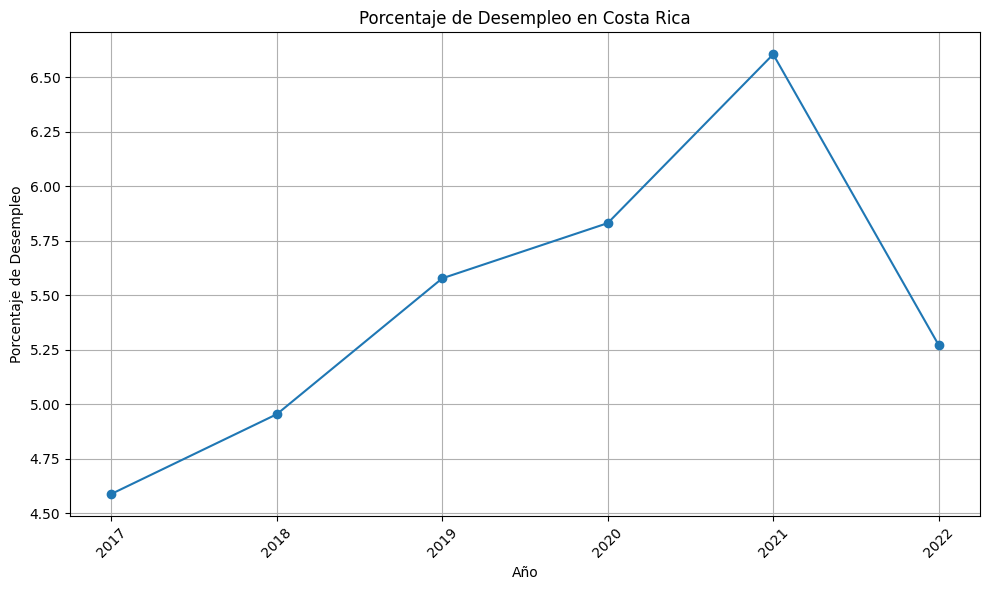

In [83]:
warnings.simplefilter(action='ignore', category=DeprecationWarning)

# Calcular el porcentaje de desempleo
total_personas = len(datosEmpleo)
desempleados = datosEmpleo[(datosEmpleo['Desempleado'] == 1)].shape[0]
porcentaje_desempleo = (desempleados / total_personas) * 100

print(f"Porcentaje de desempleo entre 2017 y 2022: {porcentaje_desempleo:.2f}%")

# Crear un DataFrame para los porcentajes de desempleo por trimestre/mes
desempleo_tiempo = datosEmpleo.groupby('ID_AMO').apply(lambda x: (x['Desempleado'] == 1).mean() * 100).reset_index()
desempleo_tiempo.columns = ['ID_AMO', 'Porcentaje_Desempleo']

# Graficar la línea de tiempo
plt.figure(figsize=(10, 6))
plt.plot(desempleo_tiempo['ID_AMO'], desempleo_tiempo['Porcentaje_Desempleo'], marker='o')
plt.title(f'Porcentaje de Desempleo en Costa Rica')
plt.xlabel('Año')
plt.ylabel('Porcentaje de Desempleo')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.xticks(desempleo_tiempo['ID_AMO'])

# Mostrar la gráfica
plt.show()

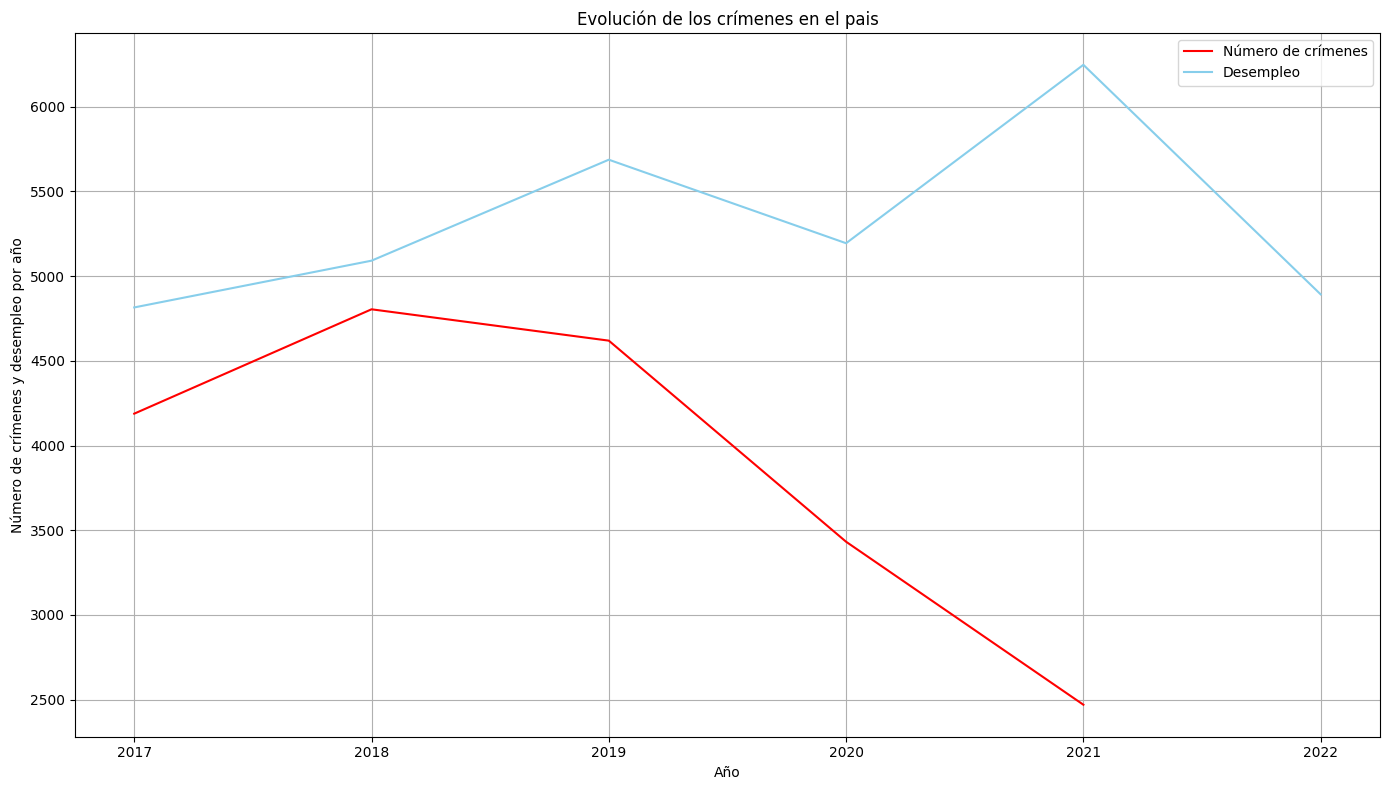

In [84]:
# Mostrar la evolucion de los crimenes por año comparado con el nivel de desempleo
try:
    
    grupoPorAnno2 = datosCrimenes.groupby(['Year']).size().reset_index(name='Count')
    desempleo_anno = datosEmpleo.groupby('ID_AMO').apply(lambda x: (x['Desempleado'] == 1).sum()).reset_index()
    desempleo_anno.columns = ['ID_AMO', 'Cantidad_Desempleados']
    
    # Generar la gráfica de barras
    plt.figure(figsize=(14, 8))
    plt.plot(grupoProvinciaPorAnno2['Year'], grupoProvinciaPorAnno2['Count'], color='red', label='Número de crímenes')
    plt.plot(desempleo_anno['ID_AMO'], desempleo_anno['Cantidad_Desempleados'], color='skyblue', label='Desempleo')
    
    plt.title('Evolución de los crímenes en el pais')
    plt.xlabel('Año')
    plt.ylabel('Número de crímenes y desempleo por año')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    # Mostrar la gráfica
    plt.show()
except TypeError as e:
    print(e)